In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kruskal
import scikit_posthocs as sp
from preprocess import preprocess_data #전처리 함수 

In [2]:
# 서부권역 파일 불러오기
trav_mas_df1 = pd.read_csv("../../data/seoul/TS_csv/tn_traveller_master_여행객 Master_A.csv")
trav_mas_df2 = pd.read_csv("../../data/seoul/VS_csv/tn_traveller_master_여행객 Master_A.csv")
va_info_df1 = pd.read_csv("../../data/seoul/TS_csv/tn_visit_area_info_방문지정보_A.csv")
va_info_df2 = pd.read_csv("../../data/seoul/VS_csv/tn_visit_area_info_방문지정보_A.csv")
trav_mas = pd.concat([trav_mas_df1,trav_mas_df2],axis=0, ignore_index=True)
va_info = pd.concat([va_info_df1,va_info_df2],axis=0, ignore_index=True)




In [3]:

mapping_plan =  {
    "VISIT_AREA_TYPE_CD": "VIS",
    "VISIT_CHC_REASON_CD": "REN",
    "DGSTFN": "DGS",
    "REVISIT_INTENTION": "REP",
    "RCMDTN_INTENTION": "REC",
    "LODGING_TYPE_CD": "HTY",
    "TRAVEL_STYL_1": "TSY",
    "TRAVEL_STYL_2": "TSY",
    "TRAVEL_STYL_3": "TSY",
    "TRAVEL_STYL_4": "TSY",
    "TRAVEL_STYL_5": "TSY",
    "TRAVEL_STYL_6": "TSY",
    "TRAVEL_STYL_7": "TSY",
    "TRAVEL_STYL_8": "TSY",
    "ACTIVITY_TYPE_CD": "ACT",
    "TRAVEL_MOTIVE_1": "TMT",
    "TRAVEL_MOTIVE_2": "TMT",
    "TRAVEL_MOTIVE_3": "TMT"
}
rename_map ={
    "TRAVEL_ID": "여행ID",
    "TRAVELER_ID": "여행ID",
    "VISIT_AREA_ID": "방문지ID",
    "ACTIVITY_TYPE_CD": "활동유형코드",
    "RESIDENCE_SGG_CD": "거주시군구코드",
    "GENDER": "성별",
    "AGE_GRP": "연령대",
    "EDU_NM": "최종학력명",
    "EDU_FNSH_SE": "최종학력여부",
    "MARR_STTS": "결혼상태",
    "FAMILY_MEMB": "가구원수",
    "JOB_NM": "직업",
    "JOB_ETC": "직업_기타",
    "INCOME": "본인소득",
    "HOUSE_INCOME": "가구소득",
    "TRAVEL_TERM": "여행일수_기간",
    "TRAVEL_NUM": "여행빈도",
    "TRAVEL_LIKE_SIDO_1": "선호여행_시도_1",
    "TRAVEL_LIKE_SGG_1": "선호여행_시군구_1",
    "TRAVEL_LIKE_SIDO_2": "선호여행_시도_2",
    "TRAVEL_LIKE_SGG_2": "선호여행_시군구_2",
    "TRAVEL_LIKE_SIDO_3": "선호여행_시도_3",
    "TRAVEL_LIKE_SGG_3": "선호여행_시군구_3",
    "TRAVEL_STYL_1": "여행스타일1",
    "TRAVEL_STYL_2": "여행스타일2",
    "TRAVEL_STYL_3": "여행스타일3",
    "TRAVEL_STYL_4": "여행스타일4",
    "TRAVEL_STYL_5": "여행스타일5",
    "TRAVEL_STYL_6": "여행스타일6",
    "TRAVEL_STYL_7": "여행스타일7",
    "TRAVEL_STYL_8": "여행스타일8",
    "TRAVEL_STATUS_RESIDENCE": "여행출발_거주지",
    "TRAVEL_STATUS_DESTINATION": "여행출발_도착지",
    "TRAVEL_STATUS_ACCOMPANY": "여행동행_유형",
    "TRAVEL_STATUS_YMD": "여행출발일자",
    "TRAVEL_MOTIVE_1": "여행동기1",
    "TRAVEL_MOTIVE_2": "여행동기2",
    "TRAVEL_MOTIVE_3": "여행동기3",
    "TRAVEL_COMPANIONS_NUM": "여행동반자수",
    "VISIT_ORDER": "진행순서",
    "VISIT_AREA_NM": "방문지명",
    "VISIT_START_YMD": "방문시작일자",
    "VISIT_END_YMD": "방문종료일자",
    "ROAD_NM_ADDR": "도로명주소",
    "LOTNO_ADDR": "지번주소",
    "X_COORD": "X좌표",
    "Y_COORD": "Y좌표",
    "ROAD_NM_CD": "도로명코드",
    "LOTNO_CD": "지번코드",
    "POI_ID": "POI ID",
    "POI_NM": "POI명",
    "RESIDENCE_TIME_MIN": "체류시간_분",
    "VISIT_AREA_TYPE_CD": "방문지역유형코드",
    "REVISIT_YN": "재방문여부",
    "VISIT_CHC_REASON_CD": "방문선택이유코드",
    "LODGING_TYPE_CD": "숙소유형코드",
    "DGSTFN": "만족도",
    "REVISIT_INTENTION": "재방문의향",
    "RCMDTN_INTENTION": "추천의향",
    "SGG_CD": "시군구코드"
}
va_info_df = preprocess_data(
    va_info,
    mapping_plan,
    rename_map,
    output_filename="va_info_Seoul.csv",
    region = 'seoul'
)

trav_mas_df = preprocess_data(
    trav_mas,
    mapping_plan,
    rename_map,
    output_filename="trav_mas_Seoul.csv",
    region = 'seoul'
)

'       VISIT_AREA_ID  TRAVEL_ID  VISIT_ORDER    VISIT_AREA_NM VISIT_START_YMD  \
0         2210300006  a_a015688            5           프로방스마을      2022-10-30   
1         2208050001  a_a000164            1           친구/친지집      2022-08-05   
2         2210030002  a_a004293            2          병점역 1호선      2022-10-03   
3         2208200003  a_a000491           12            더현대서울      2022-08-20   
4         2208110007  a_a000172           13           강릉중앙시장      2022-08-11   
...              ...        ...          ...              ...             ...   
33918     2211040008  a_a014792            8        호텔아벤트리 종로      2022-11-04   
33919     2209240009  a_a003121            9              친척집      2022-09-24   
33920     2209050004  a_a001288           23                집      2022-09-05   
33921     2210050005  a_a003349           15            L7 강남      2022-10-05   
33922     2210100002  a_a004726            2  하이브패밀리테마파크 기흥역점      2022-10-10   

      VISIT_END_YMD       

'     TRAVELER_ID  RESIDENCE_SGG_CD GENDER  AGE_GRP  EDU_NM  EDU_FNSH_SE  \
0        b015583                41      여       20       6          1.0   
1        a001105                30      남       30       6          1.0   
2        a001673                41      여       30       4          1.0   
3        a017690                41      여       30       6          1.0   
4        c006666                28      여       30       6          1.0   
...          ...               ...    ...      ...     ...          ...   
3595     a004964                11      여       20       6          1.0   
3596     c002958                41      여       30       6          1.0   
3597     a001933                28      여       40       6          1.0   
3598     a007599                41      남       40       6          1.0   
3599     a002841                28      여       20       6          1.0   

      MARR_STTS  FAMILY_MEMB  JOB_NM  JOB_ETC  ...  TRAVEL_STYL_7  \
0           1.0            5 

In [4]:
va_info = va_info_df[['여행ID','진행순서','방문지명','POI명','방문지역유형코드','방문선택이유코드']]
va_info = va_info.sort_values(by= ['여행ID','진행순서']).reset_index(drop=True)
va_info['여행ID'].value_counts()

a_a004499    60
a_a004007    46
a_a000080    43
a_a003829    42
a_a000124    41
             ..
a_a008021     1
a_a003380     1
a_a008092     1
a_a006559     1
a_a017830     1
Name: 여행ID, Length: 4000, dtype: int64

In [5]:
# 주관이 담긴 분류표 
df_theme=pd.read_csv('../../data/matrix/final_matrix.csv',index_col=0)
df_theme.index.name = '여행동기'
df_theme.loc['새로운 경험 추구', '기타'] = 1
df_theme

,숙소,자연관광지,상업지구 & 상점,역사/유적/종교시설,친구집,"테마시설(놀이공원, 와따파크)","산책로, 둘레길",체험 활동 관광지,"문화시설(공연장, 영화관, 전시관)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/ 행사,사무실,식당/ 카페,"역, 터미널, 고속도로 휴게소",집
여행동기,,,,,,,,,,,,,,,,
"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1
여행 동반자와의 친밀감 및 유대감 증진,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,0
"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1
새로운 경험 추구,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0
"역사 탐방, 문화적 경험 등 교육적 동기",0,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0
"운동, 건강 증진 및 충전",1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1
진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기,1,1,0,1,0,0,1,1,1,0,0,0,0,0,1,1
SNS 사진 등록 등 과시,1,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0
"특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)",1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0


In [6]:
trav_mas_df=trav_mas_df.sort_values(['여행ID']).reset_index(drop=True)
trav_mas_df=trav_mas_df[['여행ID','여행동기1','여행동행_유형','연령대']]
trav_mas_df['여행ID']=trav_mas_df['여행ID'].str[0] + '_' + trav_mas_df['여행ID']
#trav_mas_df = trav_mas_df[trav_mas_df["여행동기1"] != "기타"]

In [7]:
# 만약 df_theme의 index가 여행동기라면 index → 열로 이동
df_theme = df_theme.reset_index()  # or df_theme.rename_axis('여행동기_1').reset_index()
df_theme
# 병합
merged = pd.merge(trav_mas_df, df_theme, how='left', left_on='여행동기1', right_on='여행동기')
merged = merged.drop(columns=['여행동기'])
merged[merged.isnull().any(axis=1)].head()

,여행ID,여행동기1,여행동행_유형,연령대,숙소,자연관광지,상업지구 & 상점,역사/유적/종교시설,친구집,"테마시설(놀이공원, 와따파크)","산책로, 둘레길",체험 활동 관광지,"문화시설(공연장, 영화관, 전시관)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/ 행사,사무실,식당/ 카페,"역, 터미널, 고속도로 휴게소",집
3,a_a000014,기타,2인 여행(가족 외),50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,a_a000322,기타,나홀로 여행,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,a_a000444,기타,2인 여행(가족 외),20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,a_a000877,기타,나홀로 여행,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,a_a001167,기타,3인 이상 여행(가족 외),40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged = merged.rename(columns = {'테마시설(놀이공원, 와따파크)':'테마시설(놀이공원, 워터파크)'})

In [9]:
col_rename_map = {
    '문화시설(공연장, 영화관, 전시관)': '문화 시설(공연장, 영화관, 전시관 등)',
    '산책로, 둘레길': '산책로, 둘레길 등',
    '상업지구 & 상점': '상업지구(거리, 시장, 쇼핑시설)',
    '식당/ 카페': '식당/카페',
    '역사/유적/종교시설': '역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)',
    '친구집': '친구/친지집',
    '지역 축제/ 행사':'지역 축제/행사'
}
merged= merged.rename(columns=col_rename_map)
merged

,여행ID,여행동기1,여행동행_유형,연령대,숙소,자연관광지,"상업지구(거리, 시장, 쇼핑시설)","역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",친구/친지집,"테마시설(놀이공원, 워터파크)","산책로, 둘레길 등",체험 활동 관광지,"문화 시설(공연장, 영화관, 전시관 등)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/행사,사무실,식당/카페,"역, 터미널, 고속도로 휴게소",집
0,a_a000011,여행 동반자와의 친밀감 및 유대감 증진,3대 동반 여행(친척 포함),20,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,a_a000012,"역사 탐방, 문화적 경험 등 교육적 동기",나홀로 여행,30,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,a_a000013,여행 동반자와의 친밀감 및 유대감 증진,3인 이상 여행(가족 외),30,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,a_a000014,기타,2인 여행(가족 외),50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a_a000016,새로운 경험 추구,나홀로 여행,30,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,d_d005429,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,20,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3596,d_d007564,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",나홀로 여행,30,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3597,d_d008179,새로운 경험 추구,2인 여행(가족 외),20,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
3598,d_d009226,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",3대 동반 여행(친척 포함),30,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [10]:
va_info_sum = pd.pivot_table(va_info,
    index='여행ID',
    columns='방문지역유형코드',
    aggfunc='size',
    fill_value=0)
va_info_sum = va_info_sum.applymap(lambda x: 1 if x> 0 else 0)
va_info_sum[va_info_sum['집']==0]

방문지역유형코드,기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)","문화 시설(공연장, 영화관, 전시관 등)",사무실,"산책로, 둘레길 등","상업지구(거리, 시장, 쇼핑시설)",상점,숙소,식당/카페,"역, 터미널, 고속도로 휴게소","역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",자연관광지,지역 축제/행사,집,체험 활동 관광지,친구/친지집,"테마시설(놀이공원, 워터파크)"
여행ID,,,,,,,,,,,,,,,,,
a_a000108,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0
a_a000142,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,1
a_a000181,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0
a_a000182,0,0,1,0,0,1,0,1,1,1,1,0,0,0,1,1,0
a_a000186,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_c014246,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
d_d004175,0,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0
d_d007564,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
va_info['방문여부']=1
visit_matrix = va_info.pivot_table(index='여행ID',columns = '방문지역유형코드',values='방문여부',aggfunc='max',fill_value=0).reset_index()
visit_matrix.columns.name = None
visit_matrix['상업지구(거리, 시장, 쇼핑시설)'] = visit_matrix[['상업지구(거리, 시장, 쇼핑시설)', '상점']].max(axis=1)

# 2. 원래 컬럼 제거
visit_matrix = visit_matrix.drop(columns=['상점'], errors='ignore')

In [12]:
# 1. 비교할 지역유형 컬럼 추출
compare_cols = [col for col in visit_matrix.columns if col != '여행ID']

# 2. visit_matrix: 실제 방문 기록
real_df = visit_matrix.set_index('여행ID')[compare_cols].copy()

# 3. merged: 주관적 예측 데이터
# 여행동기 컬럼 제외하고 비교 대상만 추출
pred_df = merged.set_index('여행ID')[compare_cols].copy()

# 4. 공통 인덱스 및 컬럼으로 정렬 및 정제
common_ids = real_df.index.intersection(pred_df.index)
common_cols = real_df.columns.intersection(pred_df.columns)

real_df_aligned = real_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)
pred_df_aligned = pred_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)

# 5. 불일치 개수 및 비율 계산
mismatch = (real_df_aligned != pred_df_aligned).sum(axis=1)
total_cols = len(common_cols)

result = pd.DataFrame({
    '여행ID': real_df_aligned.index,
    '불일치율': mismatch / total_cols
}).reset_index(drop=True)

# 6. 여행동기 정보 붙이기
result = result.merge(merged[['여행ID', '여행동기1']], on='여행ID', how='left')

# 결과 확인
result


,여행ID,불일치율,여행동기1
0,a_a000011,0.6250,여행 동반자와의 친밀감 및 유대감 증진
1,a_a000012,0.3750,"역사 탐방, 문화적 경험 등 교육적 동기"
2,a_a000013,0.5625,여행 동반자와의 친밀감 및 유대감 증진
3,a_a000014,1.0000,기타
4,a_a000016,0.5625,새로운 경험 추구
...,...,...,...
3595,d_d005429,0.3125,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
3596,d_d007564,0.6875,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
3597,d_d008179,0.5625,새로운 경험 추구
3598,d_d009226,0.5000,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"


In [13]:
# 방문순서 오름차순 정렬
va_info_sorted = va_info.sort_values(['여행ID', '진행순서'])

# 각 여행ID별 첫/마지막 행의 인덱스
first_idx = va_info_sorted.groupby('여행ID').head(1).index
last_idx = va_info_sorted.groupby('여행ID').tail(1).index

# 첫/마지막 인덱스 중에서 '집' 또는 '친구/친지집'인 것만 추출
to_remove_idx = va_info_sorted.loc[
    first_idx.union(last_idx),
    :
].query("방문지역유형코드 in ['집', '친구/친지집']").index

# 해당 행만 제거
va_info_cleaned = va_info_sorted.drop(index=to_remove_idx).copy()
# 비교 대상 컬럼 (여행ID 제외)
compare_cols = [col for col in visit_matrix.columns if col != '여행ID']

real_df = visit_matrix.set_index('여행ID')[compare_cols]
pred_df = merged.set_index('여행ID')[compare_cols]

# 공통 여행ID, 컬럼 정렬
common_ids = real_df.index.intersection(pred_df.index)
common_cols = real_df.columns.intersection(pred_df.columns)

real_df = real_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)
pred_df = pred_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)

# 불일치율 계산
mismatch = (real_df != pred_df).sum(axis=1)
result_refined = pd.DataFrame({
    '여행ID': real_df.index,
    '불일치율_filltered': mismatch / len(common_cols)
}).reset_index(drop=True)

# 여행동기 추가
result_refined = result_refined.merge(merged[['여행ID', '여행동기1']], on='여행ID', how='left')
result_refined

,여행ID,불일치율_filltered,여행동기1
0,a_a000011,0.6250,여행 동반자와의 친밀감 및 유대감 증진
1,a_a000012,0.3750,"역사 탐방, 문화적 경험 등 교육적 동기"
2,a_a000013,0.5625,여행 동반자와의 친밀감 및 유대감 증진
3,a_a000014,1.0000,기타
4,a_a000016,0.5625,새로운 경험 추구
...,...,...,...
3595,d_d005429,0.3125,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
3596,d_d007564,0.6875,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
3597,d_d008179,0.5625,새로운 경험 추구
3598,d_d009226,0.5000,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"


In [14]:
result.describe()

,불일치율
count,3600.000000
mean,0.509722
std,0.145029
min,0.125000
25%,0.421875
50%,0.500000
75%,0.625000
max,1.000000


In [15]:
result_refined.describe()

,불일치율_filltered
count,3600.000000
mean,0.509722
std,0.145029
min,0.125000
25%,0.421875
50%,0.500000
75%,0.625000
max,1.000000


In [16]:
diff = (result['불일치율'] - result_refined['불일치율_filltered']).abs()
print("변화가 있는 여행ID 수:", (diff > 1e-6).sum())
'''
“집” 방문지 제거 유무에 따른 민감도 분석 결과, 불일치율에 유의한 차이는 나타나지 않았다.
이는 집 방문이 불일치율 계산에 포함되지 않거나, 포함되어도 시작/종착지로 일관된 위치에 있어 비교 대상에서 제외되는 방식 때문인 것으로 보인다.
따라서 본 분석에서는 “집” 방문지는 제외하는 방식으로 일관되게 처리하였다.”
'''

변화가 있는 여행ID 수: 0


'\n“집” 방문지 제거 유무에 따른 민감도 분석 결과, 불일치율에 유의한 차이는 나타나지 않았다.\n이는 집 방문이 불일치율 계산에 포함되지 않거나, 포함되어도 시작/종착지로 일관된 위치에 있어 비교 대상에서 제외되는 방식 때문인 것으로 보인다.\n따라서 본 분석에서는 “집” 방문지는 제외하는 방식으로 일관되게 처리하였다.”\n'

In [17]:
trav_mas_df['불일치율'] = result['불일치율']
trav_mas_df.dropna(inplace=True)
trav_mas_df.to_csv("../../data/seoul/불일치율_분석결과.csv", index=False, encoding='utf-8-sig')

In [18]:
trav_mas_df = pd.read_csv('../../data/seoul/불일치율_분석결과.csv')
trav_mas_df

,여행ID,여행동기1,여행동행_유형,연령대,불일치율
0,a_a000011,여행 동반자와의 친밀감 및 유대감 증진,3대 동반 여행(친척 포함),20,0.6250
1,a_a000012,"역사 탐방, 문화적 경험 등 교육적 동기",나홀로 여행,30,0.3750
2,a_a000013,여행 동반자와의 친밀감 및 유대감 증진,3인 이상 여행(가족 외),30,0.5625
3,a_a000014,기타,2인 여행(가족 외),50,1.0000
4,a_a000016,새로운 경험 추구,나홀로 여행,30,0.5625
...,...,...,...,...,...
3595,d_d005429,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,20,0.3125
3596,d_d007564,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",나홀로 여행,30,0.6875
3597,d_d008179,새로운 경험 추구,2인 여행(가족 외),20,0.5625
3598,d_d009226,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",3대 동반 여행(친척 포함),30,0.5000


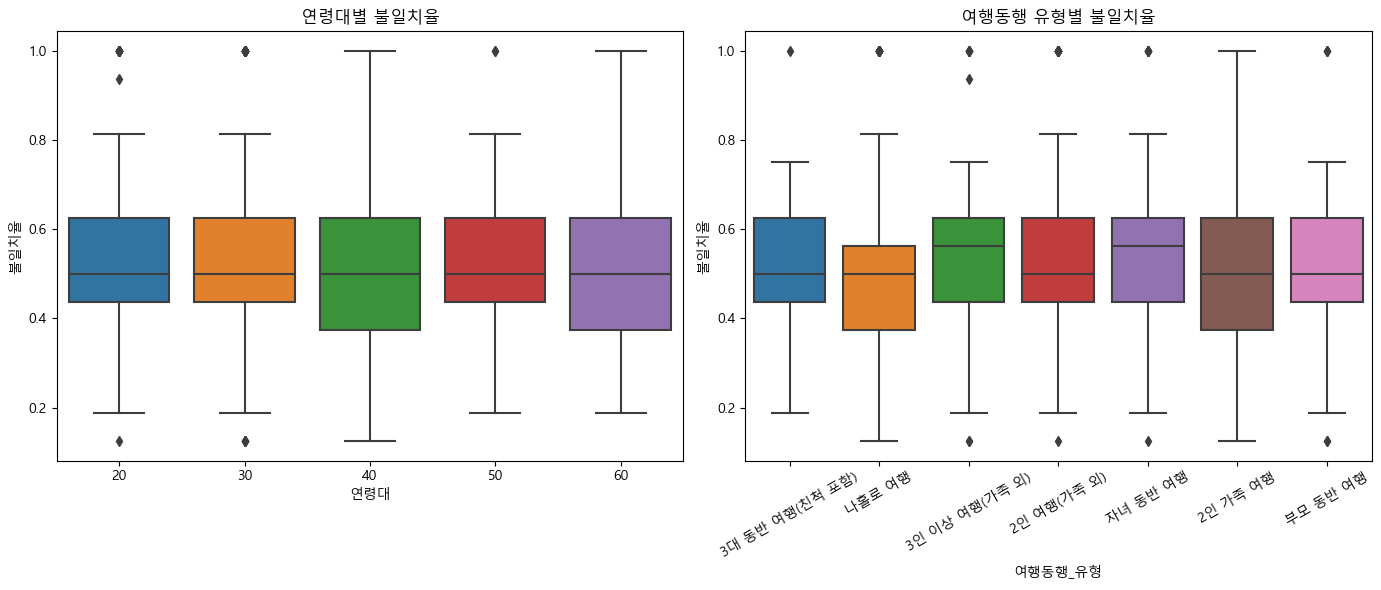

In [19]:
# 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림 틀 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 연령대별 불일치율
sns.boxplot(data=trav_mas_df, x='연령대', y='불일치율', ax=axes[0])
axes[0].set_title('연령대별 불일치율')

# 여행동행 유형별 불일치율
sns.boxplot(data=trav_mas_df, x='여행동행_유형', y='불일치율', ax=axes[1])
axes[1].set_title('여행동행 유형별 불일치율')
axes[1].tick_params(axis='x', rotation=30)  # 라벨 기울이기

plt.tight_layout()
plt.show()

In [20]:
# 결과 저장용
results = []

# 연령대별 정규성 검정
for name, group in trav_mas_df.groupby('연령대'):
    stat, p = shapiro(group['불일치율'])
    results.append((name, len(group), stat, p))

# 결과 보기
result_df = pd.DataFrame(results, columns=['연령대', '샘플 수', 'Shapiro-W', 'p-value'])
result_df['정규성 여부'] = result_df['p-value'].apply(lambda p: '정규성 만족' if p > 0.05 else '위반')
result_df.sort_values(by='연령대')


,연령대,샘플 수,Shapiro-W,p-value,정규성 여부
0,20,1276,0.964632,4.403984e-17,위반
1,30,1355,0.957409,1.901152e-19,위반
2,40,614,0.968833,3.865024e-10,위반
3,50,226,0.967423,4.669125e-05,위반
4,60,129,0.949521,1.110240e-04,위반


In [21]:
results = []

for name, group in trav_mas_df.groupby('여행동행_유형'):
    stat, p = shapiro(group['불일치율'])
    results.append((name, len(group), stat, p))

result_df = pd.DataFrame(results, columns=['동행유형', '샘플 수', 'Shapiro-W', 'p-value'])
result_df['정규성 여부'] = result_df['p-value'].apply(lambda p: '정규성 만족' if p > 0.05 else '위반')
result_df.sort_values(by='p-value')


,동행유형,샘플 수,Shapiro-W,p-value,정규성 여부
4,나홀로 여행,1220,0.958592,4.106462e-18,위반
1,2인 여행(가족 외),1060,0.959256,1.303923e-16,위반
3,3인 이상 여행(가족 외),384,0.962141,2.126302e-08,위반
6,자녀 동반 여행,483,0.970863,3.267333e-08,위반
0,2인 가족 여행,293,0.960840,4.218178e-07,위반
5,부모 동반 여행,84,0.955428,5.463956e-03,위반
2,3대 동반 여행(친척 포함),76,0.962384,2.381732e-02,위반


In [22]:
# 귀무가설(H0): 연령대 간 불일치율의 분포에 차이가 없다.

# 그룹별 데이터 준비 (연령대별 불일치율)
groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("연령대")]

# Kruskal-Wallis H-test 수행
stat, p = kruskal(*groups)

# 결과 출력
print(f"연령대별 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")

연령대별 Kruskal-Wallis 결과: H=4.362, p=0.359


In [23]:
#  귀무가설(H0): 여행동행_유형 간 불일치율의 분포에 차이가 없다.

# 그룹별 데이터 준비 (여행동행_유형 불일치율)
groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("여행동행_유형")]

# Kruskal-Wallis H-test 수행
stat, p = kruskal(*groups)

# 결과 출력
print(f"여행동행_유형 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")


여행동행_유형 Kruskal-Wallis 결과: H=73.944, p=0.000
